In [1]:
import os

import matplotlib.pyplot as plt

# import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE

In [2]:
os.getcwd()

'/storage2T/github/DomId/notebooks'

In [3]:
def load_files(path):
    df = pd.read_csv(path + "clustering_results.csv")
    domain = df["predictions"].values
    vec_d = df["vec_d_labels"].values
    vec_y = df["vec_y_labels"].values

    Z = np.load(path + "Z_space.npy")

    #args = np.loadtxt(path + "arguments.txt", dtype=str, usecols=0)  # , delimiter = '\n')
    img_locs = df["image_id_labels"].values
    #arguments = 
    return domain, vec_d, vec_y, img_locs

In [4]:

ex = '2023-04-05 09:29:44.598644/'

# Alexej's results
## color MNIST: 5 digits and 5 colors
ex = "2023-04-13 13:57:33.952604/" # cdvade'2023-03-14 11:23:24.638123/' #conditional on 5 digits 5 colors
ex = "2023-04-13 16:17:52.085393_mnistcolor10_vade/"
#ex = "2023-04-13 14:11:06.011816/" # vade '2023-03-14 11:23:06.765323/' #uconditional on 5 digits 5 colors
#ex = "2023-04-13 14:16:26.281493/" #'2023-03-14 13:33:54.115991/' #DEC on 5 digits 5 colors
ex = "2023-04-13 17:16:52.116775_mnistcolor10_vade/"  # using 100% of MNIST digits

## color MNIST: 10 digits and 10 colors
# ex = "2023-04-12 13:57:18.617964/" # vade
# ex = "2023-04-12 14:17:07.104022/"  # dec
# ex = "2023-04-12 14:56:55.661117/"  # cdvade

In [5]:
pd.read_csv(ex + "clustering_results.csv")

,vec_y_labels,vec_d_labels,predictions,image_id_labels
0,2,1,5,14813_1_both_2
1,1,1,2,7195_1_both_1
2,0,3,3,4629_3_both_0
3,3,0,4,19934_0_both_3
4,0,3,3,5694_3_both_0
...,...,...,...,...
122295,2,1,5,18604_1_both_2
122296,3,3,5,23080_3_both_3
122297,1,4,2,12400_4_both_1
122298,1,3,2,11272_3_both_1


In [6]:
domain, vec_d, vec_y, img_locs = load_files(ex)
color = vec_d
digit = vec_y

In [7]:
def something_per_domain(domain, another_label):
    """
    domain - predicted domain labels 
    another_label - some other label that corresponds to each of the predicted domain (
    assumed that both domain and something have the same img_loc reference order 
    """
    u_something = np.unique(another_label)
    u_domain = np.unique(domain)
    print('unique predicted domain', u_domain)
    print('unique true label', u_something)
    
    array_counters=[]
    for i in u_domain:
        for j in u_something:
            counter = 0
            for idx in range(0, len(domain)):
                if domain[idx]==i and another_label[idx]==j:
                    counter+=1
            print('domain ', i, ' digit ', j, ' count', counter)
            array_counters.append(counter)
    return array_counters
                    
        
    

In [8]:
digits_per_domain = something_per_domain(domain, digit)

unique predicted domain [1 2 3 4 5]
unique true label [0 1 2 3 4]
domain  1  digit  0  count 0
domain  1  digit  1  count 10291
domain  1  digit  2  count 2
domain  1  digit  3  count 6
domain  1  digit  4  count 9
domain  2  digit  0  count 0
domain  2  digit  1  count 15491
domain  2  digit  2  count 9
domain  2  digit  3  count 24
domain  2  digit  4  count 15
domain  3  digit  0  count 12461
domain  3  digit  1  count 1
domain  3  digit  2  count 104
domain  3  digit  3  count 51
domain  3  digit  4  count 0
domain  4  digit  0  count 9559
domain  4  digit  1  count 569
domain  4  digit  2  count 11462
domain  4  digit  3  count 10482
domain  4  digit  4  count 14088
domain  5  digit  0  count 1662
domain  5  digit  1  count 531
domain  5  digit  2  count 12252
domain  5  digit  3  count 13919
domain  5  digit  4  count 9312


In [9]:
digits_per_domain

[0,
 10291,
 2,
 6,
 9,
 0,
 15491,
 9,
 24,
 15,
 12461,
 1,
 104,
 51,
 0,
 9559,
 569,
 11462,
 10482,
 14088,
 1662,
 531,
 12252,
 13919,
 9312]

In [10]:
colors_per_domain = something_per_domain(domain, color)

unique predicted domain [1 2 3 4 5]
unique true label [0 1 2 3 4]
domain  1  digit  0  count 5163
domain  1  digit  1  count 0
domain  1  digit  2  count 5145
domain  1  digit  3  count 0
domain  1  digit  4  count 0
domain  2  digit  0  count 0
domain  2  digit  1  count 5201
domain  2  digit  2  count 0
domain  2  digit  3  count 5126
domain  2  digit  4  count 5212
domain  3  digit  0  count 61
domain  3  digit  1  count 4170
domain  3  digit  2  count 64
domain  3  digit  3  count 4197
domain  3  digit  4  count 4125
domain  4  digit  0  count 12927
domain  4  digit  1  count 6712
domain  4  digit  2  count 13018
domain  4  digit  3  count 6706
domain  4  digit  4  count 6797
domain  5  digit  0  count 6311
domain  5  digit  1  count 8378
domain  5  digit  2  count 6234
domain  5  digit  3  count 8425
domain  5  digit  4  count 8328


In [11]:
colors_per_domain

[5163,
 0,
 5145,
 0,
 0,
 0,
 5201,
 0,
 5126,
 5212,
 61,
 4170,
 64,
 4197,
 4125,
 12927,
 6712,
 13018,
 6706,
 6797,
 6311,
 8378,
 6234,
 8425,
 8328]

In [12]:
len(digits_per_domain)

25

In [13]:



def plot_something_per_domain_counts(domain, another_label, counts, fs, legend = False, thres = None):
    """
    domain - predicted domain labels
    another_label - another label aassociated with each predicted domain (should be same shape as domain)
    counts - countes of each another label in each of the predicted domain (see something_per_domain function)
    fs - font size
    colors - colors of each segment on the bargraph
    legend - legend of unique another lables
    thres - if thresholding of another label is required then should be shpecifies (also see apply_threshold function)
    
    """
    u_domains = np.unique(domain)
    N = len(u_domains)
    
    u_another_label = np.unique(another_label)
    print('unique labels', u_another_label, ' N ', N)
    counts = np.array(counts)
    narray = np.array_split(counts, N)

#     if thres:
#         u_another_label_dic = apply_threshold(u_another_label, narray, thres, N)
#         #print(u_another_label_dic.values())
#         u_another_label = list(u_another_label_dic.keys())
#         narray = list(u_another_label_dic.values())
#         narray = np.transpose(narray)

   # print(narray)
    #print(len(u_domains), len(u_another_label))
    c = ['blue', 'teal', 'pink', 'orange', 'green', 'red', 'plum', 'grey', 'purple', 'yellow']
    c = ['lightblue', 'steelblue', 'royalblue', 'mediumpurple', 'darkmagenta','orchid', 'lightpink', 'lightcoral', 'maroon', 'sandybrown']
    plt.figure()
    for i in range(0, len(u_domains)):
        for jj in range(0,len(u_another_label)):
            
            if jj>0:
                bottom = np.sum(narray[i][:jj])
            else:
                bottom = 0
            #print(i, narray[i][jj])
            plt.bar(i, narray[i][jj], bottom = bottom, color = c[jj])
    x = np.linspace(0, N-1, N)
    x_ticks = u_domains
    plt.ylabel("Counts", fontsize=fs)
    plt.xticks(x, x_ticks, fontsize=fs)
    plt.yticks(fontsize=fs)
    plt.xlabel("Domain", fontsize=fs)
   
    if legend:
        plt.legend(legend)
    else:
        plt.legend(u_another_label)
    plt.show()

In [14]:
def plot_something_per_domain_proportion(domain, another_label, counts, fs, legend = False, thres = None, title = None, digit_plot = True):
    """
    domain - predicted domain labels
    another_label - another label aassociated with each predicted domain (should be same shape as domain)
    counts - countes of each another label in each of the predicted domain (see something_per_domain function)
    fs - font size
    colors - colors of each segment on the bargraph
    legend - legend of unique another lables
    thres - if thresholding of another label is required then should be shpecifies (also see apply_threshold function)
    
    """
    u_domains = np.unique(domain)
    N = len(u_domains)
    
    u_another_label = np.unique(another_label)
    print('unique labels', u_another_label)
    print(u_domains)
    counts = np.array(counts)
    narray = np.array_split(counts, N)

    if thres:
        u_another_label_dic = apply_threshold(u_another_label, narray, thres, N)
        #print(u_another_label_dic.values())
        u_another_label = list(u_another_label_dic.keys())
        narray = list(u_another_label_dic.values())
        narray = np.transpose(narray)

   # print(narray)
    #print(len(u_domains), len(u_another_label))
    # c = ['blue', 'teal', 'pink', 'orange', 'green', 'red', 'plum', 'grey', 'purple', 'yellow']
    # c = ['lightblue', 'steelblue', 'royalblue', 'mediumpurple', 'darkmagenta','orchid', 'lightpink', 'lightcoral', 'maroon', 'sandybrown']
    
    if digit_plot:
        c =  ['darkseagreen', 'forestgreen', 'aquamarine', 'lightseagreen', 'teal', 'steelblue','lightblue', 'royalblue','navy', 'lightslategrey' ]

    else:
        c = ['mediumpurple', 'darkmagenta','orchid', 'lightpink', 'lightcoral', 'maroon', 'sandybrown', 'peachpuff', 'goldenrod', 'gold']
  
        
    plt.figure(figsize = (5, 5))
    for i in range(0, len(u_domains)):
        for jj in range(0,len(u_another_label)):
            
            if jj>0:
                bottom = np.sum(narray[i][:jj])/np.sum(narray[i])
            else:
                bottom = 0
            ##print(i, narray[i][jj])
            #print(c[jj])
            plt.bar(i, narray[i][jj]/np.sum(narray[i]), bottom = bottom, color = c[jj])
    x = np.linspace(0, N-1, N)
    x_ticks = [str(item)[0] for item in u_domains]
    #plt.ylabel("Proportion", fontsize=fs)
    plt.xticks(x, x_ticks, fontsize=fs)
    plt.yticks(fontsize=fs)
    plt.xlabel("Domain", fontsize=fs)
    plt.title(title, fontsize = fs, weight = 'bold')
    plt.tick_params(left = False, labelleft = False)
#     if legend:
#         plt.legend(legend, bbox_to_anchor=(0.5, -0.05))
#     else:
#         plt.legend(u_another_label, bbox_to_anchor=(1, 0.70), fancybox=True, shadow=True, fontsize = fs)
    plt.show()

unique labels [0 1 2 3 4]  N  5


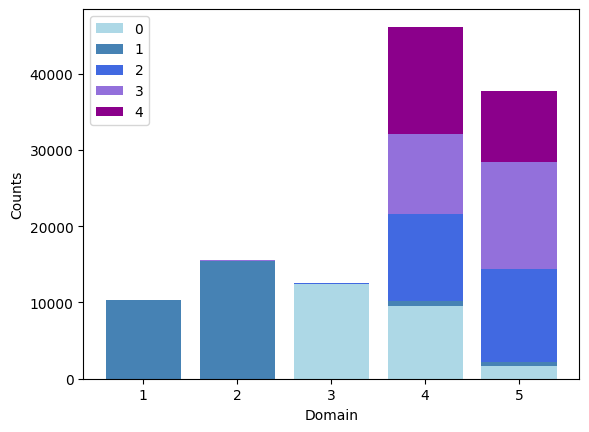

In [15]:
plot_something_per_domain_counts(domain, digit, digits_per_domain, fs =10)

unique labels [0 1 2 3 4]  N  5


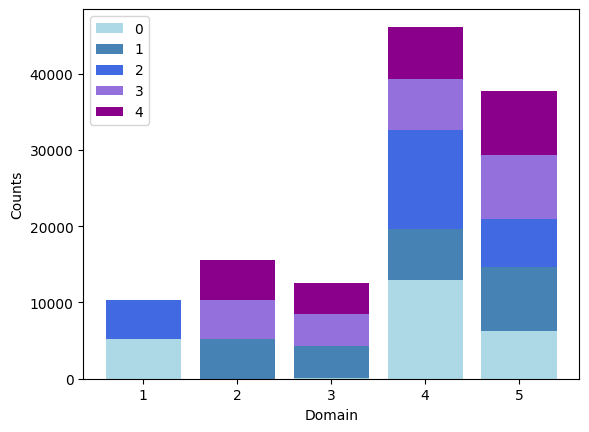

unique labels [0 1 2 3 4]
[1 2 3 4 5]


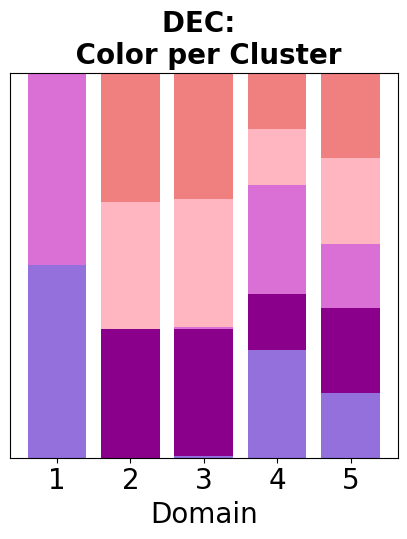

In [16]:
plot_something_per_domain_counts(domain, color, colors_per_domain, fs =10) 
plot_something_per_domain_proportion(domain, color, colors_per_domain, fs =20, title = 'DEC: \n Color per Cluster', digit_plot = False ) 

unique labels [0 1 2 3 4]  N  5


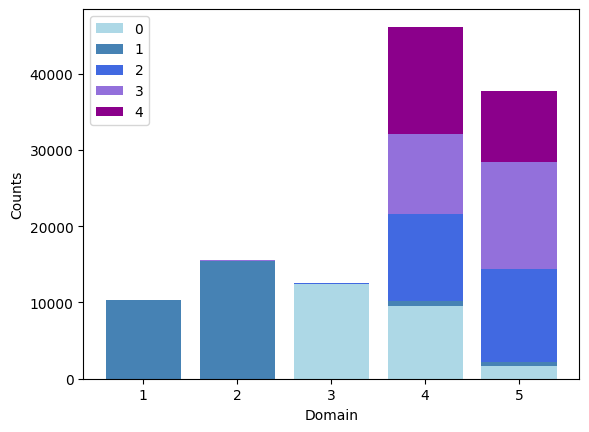

In [17]:
plot_something_per_domain_counts(domain, digit, digits_per_domain, fs =10) #, legend = ['forest background', 'ocean background'])

In [18]:
digit

array([2, 1, 0, ..., 1, 1, 3])

unique labels [0 1 2 3 4]
[1 2 3 4 5]


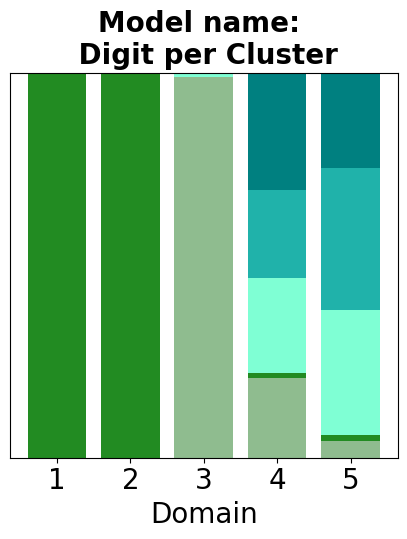

In [19]:
plot_something_per_domain_proportion(domain, digit, digits_per_domain, fs =20, title = 'Model name: \n Digit per Cluster')